In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df= pd.read_csv(r"C:\Users\T3DCOMPUTER\Downloads\loans_full_schema.csv")

# Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
df.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Drop columns have over 50% of null

In [5]:
df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late'], axis=1, inplace=True)

Drop columns that are calculated results from interest rates

In [6]:
df.drop(['balance','paid_total','paid_principal', 'paid_interest', 'paid_late_fees','loan_status','installment','loan_status'], axis=1, inplace=True)

Fill null values

In [7]:
df['emp_title'] = df['emp_title'].fillna('unemployed')

In [8]:
mode_cols = ['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Data visualization

## Correlation heatmap

In [9]:
sub1=df[['interest_rate', 'emp_length', 'annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry']]

In [10]:
sub2=df[['interest_rate', 'num_satisfactory_accounts', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'loan_amount', 'term']]

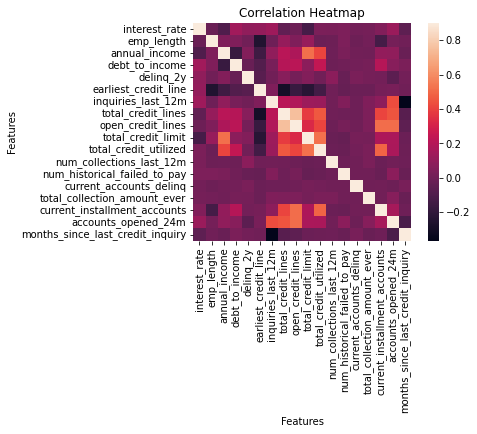

In [11]:
corrmat = sub1.corr()
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [12]:
sub1.corr()

,interest_rate,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry
interest_rate,1.000000,-0.022417,-0.099584,0.139813,0.090456,0.103635,0.131193,-0.044435,-0.012773,-0.130497,0.031527,0.029901,0.037563,0.007184,0.013532,0.047131,0.120657,-0.054970
emp_length,-0.022417,1.000000,0.043904,0.041248,0.003907,-0.252359,-0.007038,0.108825,0.043861,0.109527,-0.018291,-0.012804,0.036385,-0.011460,0.007463,-0.132869,0.014772,-0.003413
annual_income,-0.099584,0.043904,1.000000,-0.175986,0.052236,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,0.001665,-0.000080,0.096542,0.094446,-0.019348
debt_to_income,0.139813,0.041248,-0.175986,1.000000,-0.027411,-0.090660,0.025039,0.199884,0.217677,0.075951,0.238662,-0.010841,-0.003761,0.007358,0.019150,0.201298,0.068055,0.033671
delinq_2y,0.090456,0.003907,0.052236,-0.027411,1.000000,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,0.026097,0.011577,0.005762,-0.062541,0.006215
earliest_credit_line,0.103635,-0.252359,-0.156001,-0.090660,-0.078109,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,-0.000813,-0.031572,-0.018333,-0.018070,0.016580,0.024696,-0.002381
inquiries_last_12m,0.131193,-0.007038,0.090119,0.025039,0.003152,0.042745,1.000000,0.210433,0.186462,0.128325,0.120593,0.005236,0.045934,-0.008228,0.042058,0.080310,0.426644,-0.364909
total_credit_lines,-0.044435,0.108825,0.210163,0.199884,0.068040,-0.294621,0.210433,1.000000,0.756209,0.385948,0.458980,-0.003843,-0.007679,-0.005621,0.036873,0.406435,0.448262,-0.075753
open_credit_lines,-0.012773,0.043861,0.176788,0.217677,0.013050,-0.174322,0.186462,0.756209,1.000000,0.326560,0.406047,-0.011692,0.017600,-0.004098,0.039843,0.510100,0.509680,-0.056262
total_credit_limit,-0.130497,0.109527,0.516703,0.075951,0.053373,-0.231230,0.128325,0.385948,0.326560,1.000000,0.520876,-0.021652,-0.033266,0.015695,0.012806,0.175712,0.169143,-0.017780


In [13]:
sub2.corr()

,interest_rate,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term
interest_rate,1.000000,-0.013330,NaN,0.007184,0.026800,-0.254225,-0.071238,-0.028891,0.081741,-0.138351,-0.124702,0.016547,0.047477,0.064527,0.358664
num_satisfactory_accounts,-0.013330,1.000000,NaN,-0.005768,0.593421,0.445401,0.718405,0.855009,0.693776,0.156740,0.106828,0.015452,0.005217,0.154611,0.068103
num_accounts_120d_past_due,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_accounts_30d_past_due,0.007184,-0.005768,NaN,1.000000,-0.006553,-0.005028,-0.003848,-0.006308,-0.003698,0.003593,-0.014910,-0.000729,-0.003672,0.001590,0.015168
num_active_debit_accounts,0.026800,0.593421,NaN,-0.006553,1.000000,0.524636,0.505251,0.678094,0.845149,0.040865,0.107968,0.038475,-0.031795,0.158465,0.024869
total_debit_limit,-0.254225,0.445401,NaN,-0.005028,0.524636,1.000000,0.444058,0.489352,0.364510,0.227343,0.217834,-0.001829,-0.126744,0.319198,0.048206
num_total_cc_accounts,-0.071238,0.718405,NaN,-0.003848,0.505251,0.444058,1.000000,0.834036,0.618839,0.202387,0.046714,0.002738,0.027567,0.142474,0.033330
num_open_cc_accounts,-0.028891,0.855009,NaN,-0.006308,0.678094,0.489352,0.834036,1.000000,0.799353,0.094088,0.123880,0.024227,0.033514,0.141336,0.036153
num_cc_carrying_balance,0.081741,0.693776,NaN,-0.003698,0.845149,0.364510,0.618839,0.799353,1.000000,0.061166,0.085026,0.039131,0.014765,0.126637,0.021619
num_mort_accounts,-0.138351,0.156740,NaN,0.003593,0.040865,0.227343,0.202387,0.094088,0.061166,1.000000,-0.024900,-0.011855,-0.048583,0.201853,0.107991


Numeric data columns do not have a strong correlation with interest_rate, the highest paid_interest is just over 0.35
Some columns have a huge correlation with each other, while don't have clear correlation with interest_rate can be merged or deleted.
As most correlation with interest rate are too small, only features that are directly related to interest rates will be retained.

In [15]:
df['num_accounts_120d_past_due'].head(5)
df.drop(df['num_accounts_120d_past_due'], inplace=True)

## Distribution plot

C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


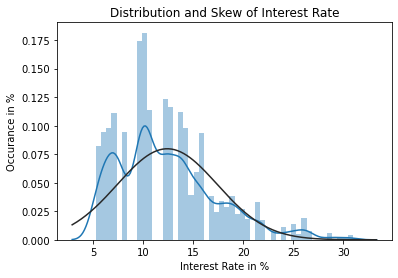

In [16]:
from scipy.stats import norm
sns.distplot(df['interest_rate'], fit=norm)
plt.title("Distribution and Skew of Interest Rate")
plt.xlabel("Interest Rate in %")
plt.ylabel("Occurance in %")
plt.show()

Most values of interest rate are lower than 20%. The most common is 10%.

## Box plot

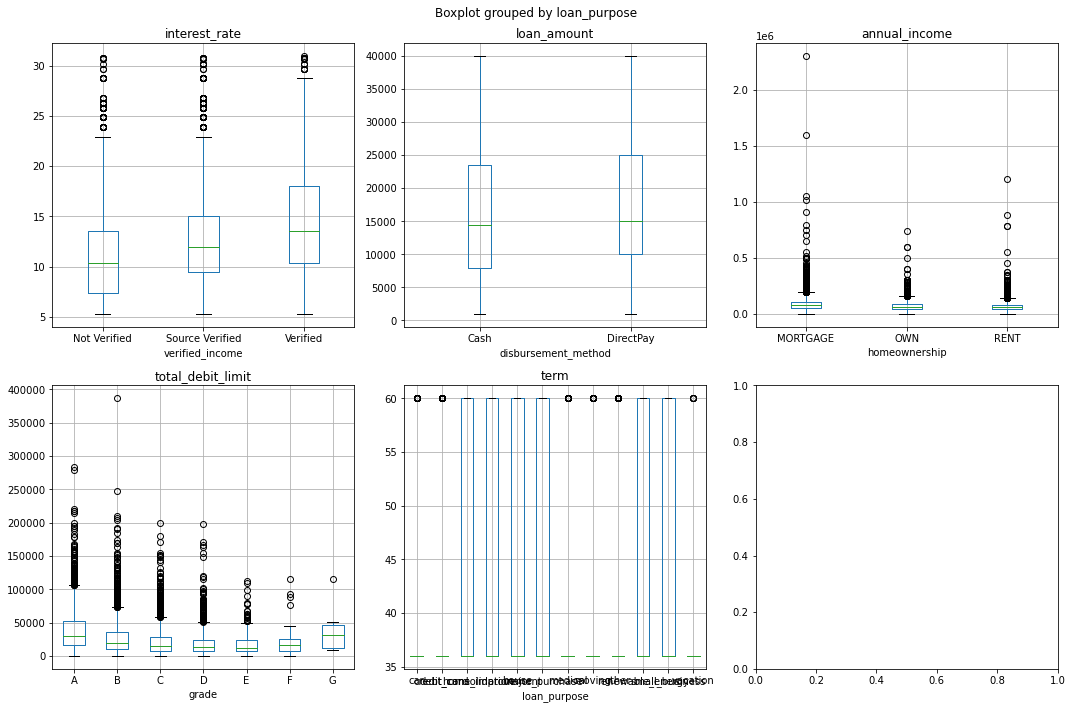

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
col_list = ['interest_rate','loan_amount', 'annual_income','total_debit_limit','term']
by_dict = {0: "verified_income", 1:"disbursement_method", 2:'homeownership', 3:"grade", 4:'loan_purpose'}

for i,el in enumerate(col_list):
    a = df.boxplot(el, by=by_dict[i], ax=axes.flatten()[i])
plt.tight_layout()
plt.show()

Remove some ouliers of annual income.

In [18]:
df = df[(df['annual_income']<=500000)]

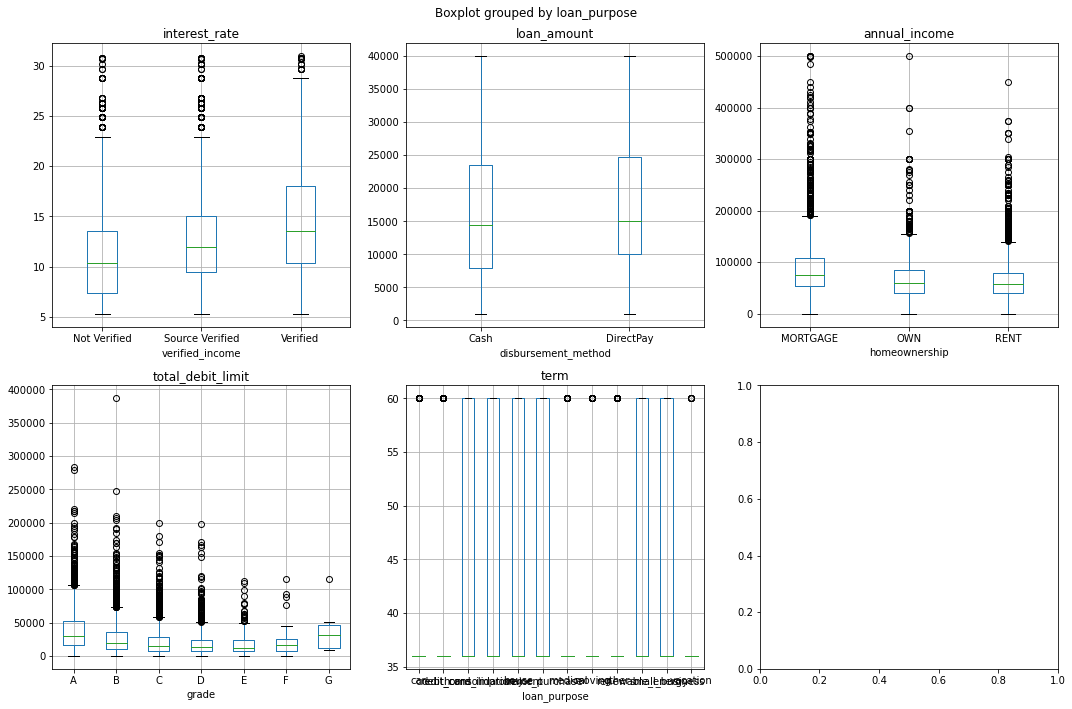

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
col_list = ['interest_rate','loan_amount', 'annual_income','total_debit_limit','term']
by_dict = {0: "verified_income", 1:"disbursement_method", 2:'homeownership', 3:"grade", 4:'loan_purpose'}

for i,el in enumerate(col_list):
    a = df.boxplot(el, by=by_dict[i], ax=axes.flatten()[i])
plt.tight_layout()
plt.show()

(0,0)It is strange that unverified-income loans generally have lower interest rates than verified ones. The number of high-interest loans (>20%) of unverified accounts is larger than verified accounts, but the number is still insignificant compared to the amount of low-interest loans. However, it can be shown that verification status seems to have a relationship with interest rate.
(0,1) No significant outliers were noted. The average cash loans have a smaller total amount than DirectPay loans but not significantly, indicating that the lending institution is relatively reputable and highly secure.
(0,2) Homeowners are not much weathier than renters, and even poorer than mortgagors. The majority of borrowers have an average income of less than 100,000. However, there are many people with high income (compared to the rest) still choose to borrow at this institution.
(1,0) People with higher total debit limit often have better loan grade, but the trend is not so clear
(1,1) There is no relationship between the loan term and the loan purposes

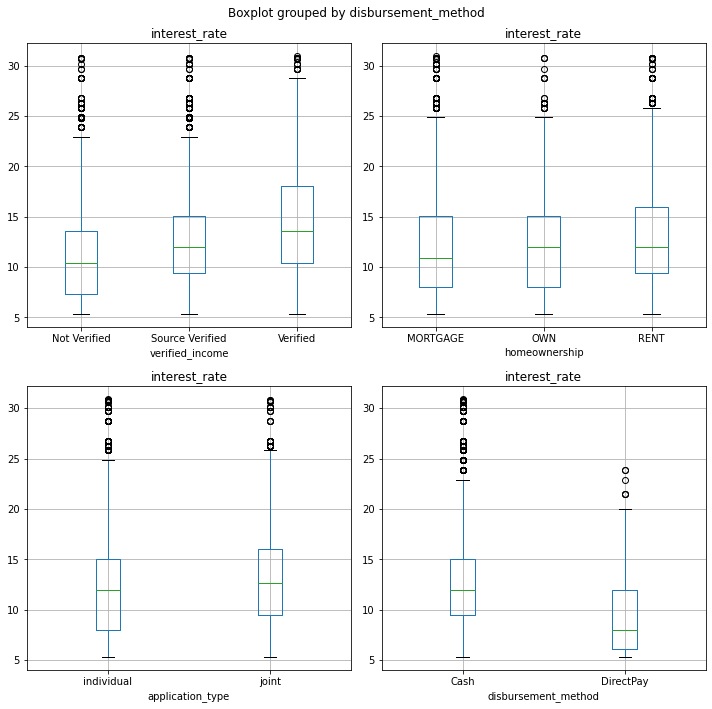

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
col_list = ['interest_rate','interest_rate', 'interest_rate','interest_rate']
by_dict = {0: 'verified_income', 1:'homeownership', 2: 'application_type', 3:'disbursement_method'}

for i,el in enumerate(col_list):
    a = df.boxplot(el, by=by_dict[i], ax=axes.flatten()[i])
plt.tight_layout()
plt.show()

Home ownership and loan method do not appear to have much impact on interest rates.

In [21]:
df = df[(df['interest_rate']<30)]

## Line plot

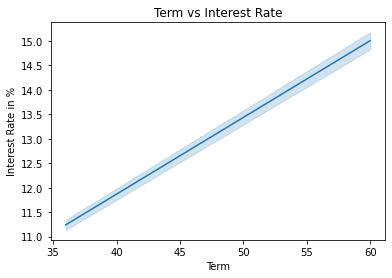

In [22]:
sns.lineplot(x=df['term'], y=df['interest_rate'])
plt.title("Term vs Interest Rate")
plt.xlabel("Term")
plt.ylabel("Interest Rate in %")
plt.show()

Term has a fairly clear linear relationship with interest rates

## Scatter plot

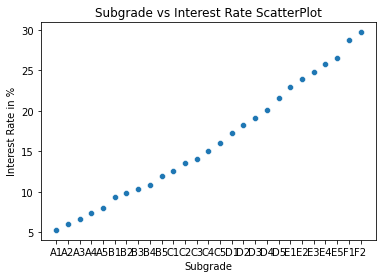

In [23]:
info = df.copy()
a = info.groupby('sub_grade').mean()
sns.scatterplot(x=a.index, y=a['interest_rate'])
plt.title("Subgrade vs Interest Rate ScatterPlot")
plt.xlabel("Subgrade")
plt.ylabel("Interest Rate in %")
plt.show()

Clearly there is a strong linear relationship between subgrade and interest rate. 

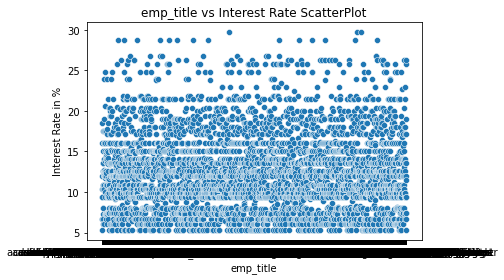

In [24]:
b = info.groupby('emp_title').mean()
sns.scatterplot(x=b.index, y=b['interest_rate'])
plt.title("emp_title vs Interest Rate ScatterPlot")
plt.xlabel("emp_title")
plt.ylabel("Interest Rate in %")
plt.show()

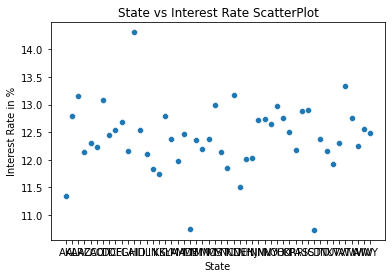

In [25]:
c = info.groupby('state').mean()
sns.scatterplot(x=c.index, y=c['interest_rate'])
plt.title("State vs Interest Rate ScatterPlot")
plt.xlabel("State")
plt.ylabel("Interest Rate in %")
plt.show()

No relationship between emp_title and interest rate, and between state and interest rate was found.

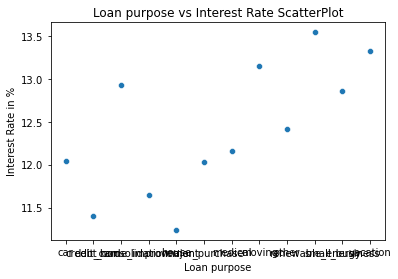

In [26]:
d = info.groupby('loan_purpose').mean()
sns.scatterplot(x=d.index, y=d['interest_rate'])
plt.title("Loan purpose vs Interest Rate ScatterPlot")
plt.xlabel("Loan purpose")
plt.ylabel("Interest Rate in %")
plt.show()

It seems that there is a linear relationship between borrowing purposes and interest rates.

# Data preprocessing

In [27]:
X=df[['annual_income','loan_amount','term','total_debit_limit','verified_income', 'disbursement_method','sub_grade','loan_purpose']]
Y=df[['interest_rate']]

In [28]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object"]).columns.tolist(),
        drop_first=True,
    )
    return x
X = encode_cat_vars(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model development

## Linear Regression

In [31]:
import datetime
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

t1 = datetime.datetime.now()
model1=lr.fit(X_train, Y_train)
t2= datetime.datetime.now()
d2 = round((t2-t1).microseconds/1000,1)
print('run time:', d2)

Y_pred = model1.predict(X_test)

print('The train score is : ',model1.score(X_train,Y_train))
print('The test score is : ',model1.score(X_test,Y_test))

run time: 28.0
The train score is :  0.9977857771579528
The test score is :  0.9812089502224033


C:\Users\T3DCOMPUTER\AppData\Local\Temp\ipykernel_21232\2422680888.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 35],[0, 35],'k-',color='red')


Text(0.5, 1.0, 'Interest rate vs Predicted interest rate: $Y_i$ vs $\\hat{Y}_i$')

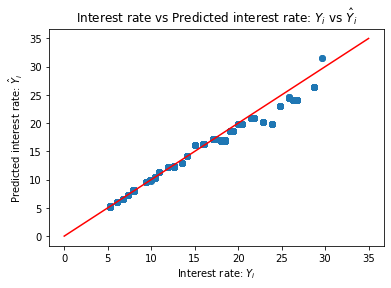

In [32]:
plt.scatter(Y_test, Y_pred)
plt.plot([0, 35],[0, 35],'k-',color='red')
plt.xlabel("Interest rate: $Y_i$")
plt.ylabel("Predicted interest rate: $\hat{Y}_i$")
plt.title("Interest rate vs Predicted interest rate: $Y_i$ vs $\hat{Y}_i$")


C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

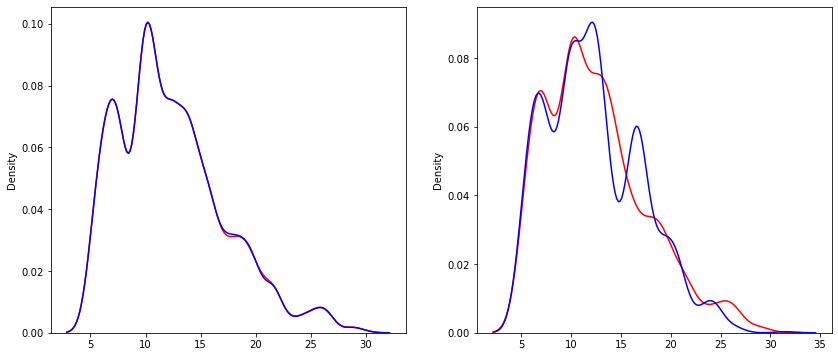

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(Y_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lr.predict(X_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(Y_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lr.predict(X_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

The training results are quite good with the test score up to 0.98

## SVR

In [34]:
from sklearn.svm import SVR
svr = SVR(C=100)

t1 = datetime.datetime.now()
model2=svr.fit(X_train, Y_train)
t2= datetime.datetime.now()
d2 = round((t2-t1).microseconds/1000,1)
print('run time:', d2)

Y_pred = model2.predict(X_test)

print('The train score is : ',model2.score(X_train,Y_train))
print('The test score is : ',model2.score(X_test,Y_test))

C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


run time: 817.2
The train score is :  0.9979264883788684
The test score is :  0.9777626293818946


C:\Users\T3DCOMPUTER\AppData\Local\Temp\ipykernel_21232\397749505.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 35],[0, 35],'k-',color='red')


Text(0.5, 1.0, 'Interest rate vs Predicted interest rate: $Y_i$ vs $\\hat{Y}_i$')

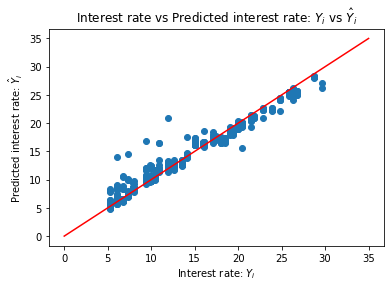

In [35]:
plt.scatter(Y_test, Y_pred)
plt.plot([0, 35],[0, 35],'k-',color='red')
plt.xlabel("Interest rate: $Y_i$")
plt.ylabel("Predicted interest rate: $\hat{Y}_i$")
plt.title("Interest rate vs Predicted interest rate: $Y_i$ vs $\hat{Y}_i$")

C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\T3DCOMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

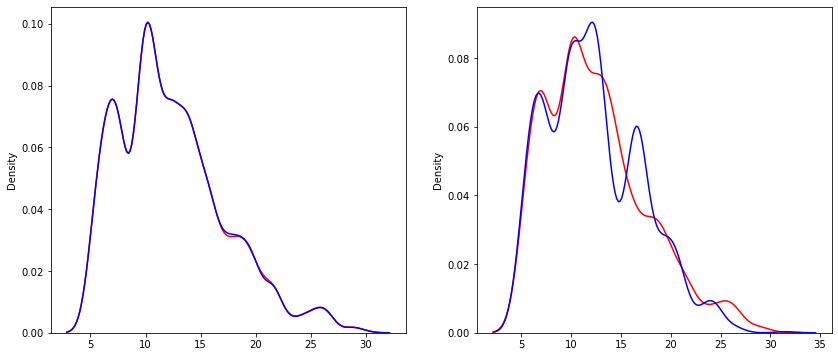

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(Y_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lr.predict(X_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(Y_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lr.predict(X_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

SVR has much longer runtime and worse test score